# The ADI Method
Qifei Cui #9453614

In [1]:
#Setting up Environment
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

## Question 1

Consider the Heat equation in the unit square $[0,1]\times [0,1]$

$$
u_t=u_{xx}+u_{yy},
$$

with the initial condition,

$$u(0,x,y)=\sin(\pi x)\sin(\pi y),$$

and the homogeneous Dirichlet boundary condition $u=0$.

### Part (a)
Implement the ADI method to find an approximation to this initial-boundary
value problem. Determine $\Delta x$ and $\Delta t$ so that the numerical approximation is
well resolved both in space and time. Does numerical stability play a role in your
choice of $\Delta t$ and $\Delta x$? Explain.

Function to construct tridiagonal matrix.

In [2]:
def tridiag(a, b, c):
    return np.diag(a, -1) + np.diag(b, 0) + np.diag(c, 1)

We need the tridiagonal matrix solver, solving for the following matrix:

$$
\left[
\begin{matrix}
    b_0 & c_0 & 0 & \cdots & 0\\
    a_1 & b_1 & c_1 & \cdots & 0 \\
    0 & a_2 & b_2 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & b_n
\end{matrix}
\right]
\left[
\begin{matrix}
    d_0 \\
    d_1 \\
    d_2 \\
    \vdots \\
    d_n
\end{matrix}
\right]
$$

By applying forward elimination and backward elimination to find the solution

In [3]:
def tms(a,b,c,d):
    n = len(d)
    x = np.zeros(n)
    c_ = np.zeros(n)
    d_ = np.zeros(n)
    
    #Forward Elimination
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    
    for i in range(1, n):  # changed 0 to 1
        temp = b[i] - a[i] * c_[i-1]
        c_[i] = c[i] / temp
        d_[i] = (d[i] - a[i] * d_[i-1]) / temp
        
    #Backward Elimination
    for i in range(n-2,-1,-1):
        d_[i] = d_[i] - c_[i] * d_[i+1]
    
    return d_

Now, consider the ADI method

$$
\begin{align*}
u^*_{l,m}&=u^n_{l,m}+\frac{1}{2}[\alpha_x \delta^2_x u^*_{l,m} + \alpha_y \delta^2_y u^n_{l,m}] \\
&=u^n_{l,m}+\frac{1}{2}[\alpha_x( u^*_{l-1,m} -2u^*_{l,m} + u^*_{l+1,m} )+ \alpha_y (u^n_{l,m-1} -2u^n_{l,m} + u^n_{l,m+1})] \\
&=u^n_{l,m}+\frac{1}{2}\alpha_x u^*_{l-1,m} - \alpha_x  u^*_{l,m} + \frac{1}{2}\alpha_x  u^*_{l+1,m} + \frac{1}{2}\alpha_y u^n_{l,m-1} - \alpha_y u^n_{l,m} + \frac{1}{2}\alpha_y u^n_{l,m+1}
\end{align*}
$$

where 

$$
\delta^2_x u^n_{l,m} = u^n_{l-1,m} -2u^n_{l,m} + u^n_{l+1,m} \\
\delta^2_y u^n_{l,m} = u^n_{l,m-1} -2u^n_{l,m} + u^n_{l,m+1}
$$

Move all $u^*$ terms on left side we have

$$
\begin{align*}
(1 + \alpha_x)u^*_{l,m} - \frac{1}{2}\alpha_x u^*_{l-1,m}  - \frac{1}{2}\alpha_x  u^*_{l+1,m} &= (1- \alpha_y) u^n_{l,m} + \frac{1}{2}\alpha_y u^n_{l,m-1}  + \frac{1}{2}\alpha_y u^n_{l,m+1} \\
(1 + \alpha_x)u^*_{l,m} - \frac{1}{2}\alpha_x u^*_{l-1,m}  - \frac{1}{2}\alpha_x  u^*_{l+1,m} &= Y
\end{align*}
$$

Similarily

$$
\begin{align*}
u^{n+1}_{l,m}&=u^*_{l,m}+\frac{1}{2}[\alpha_x \delta^2_x u^*_{l,m} + \alpha_y \delta^2_y u^{n+1}_{l,m}]  \\
&=u^*_{l,m}+\frac{1}{2}[\alpha_x( u^*_{l-1,m} -2u^*_{l,m} + u^*_{l+1,m} )+ \alpha_y (u^{n+1}_{l,m-1} -2u^{n+1}_{l,m} + u^{n+1}_{l,m+1})] \\
&=u^*_{l,m}+\frac{1}{2}\alpha_x u^*_{l-1,m} - \alpha_x  u^*_{l,m} + \frac{1}{2}\alpha_x  u^*_{l+1,m} + \frac{1}{2}\alpha_y u^{n+1}_{l,m-1} - \alpha_y u^{n+1}_{l,m} + \frac{1}{2}\alpha_y u^{n+1}_{l,m+1}
\end{align*}
$$

Move all $u^{n+1}$ terms on left side we have

$$
\begin{align*}
(1 + \alpha_y)u^{n+1}_{l,m} - \frac{1}{2}\alpha_y u^{n+1}_{l,m-1}  - \frac{1}{2}\alpha_y  u^{y}_{l,m+1} &= (1- \alpha_x) u^*_{l,m} + \frac{1}{2}\alpha_x u^*_{l-1,m}  + \frac{1}{2}\alpha_x u^*_{l+1,m} \\
(1 + \alpha_y)u^{n+1}_{l,m} - \frac{1}{2}\alpha_y u^{n+1}_{l,m-1}  - \frac{1}{2}\alpha_y  u^{y}_{l,m+1} &= X
\end{align*}
$$


Then the matrix of interface is

$$
\left[
\begin{matrix}
1 & 0 & 0 & \dots & 0 & 0 & 0 \\
-\frac{1}{2}\alpha_x & 1+\alpha_x & -\frac{1}{2}\alpha_x & \dots & 0 & 0 & 0 \\
0 & -\frac{1}{2}\alpha_x  & 1+\alpha_x & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & 1+\alpha_x & -\frac{1}{2}\alpha_x  & a \\
0 & 0 & 0 & \dots & -\frac{1}{2}\alpha_x  & 1+\alpha_x & -\frac{1}{2}\alpha_x  \\
0 & 0 & 0 & \dots & 0 & 0 & 1 
\end{matrix}
\right]
\left[
\begin{matrix}
u^*_{0,m} \\
u^*_{1,m} \\
u^*_{2,m} \\
\vdots \\
u^*_{L-2,m} \\
u^*_{L-1,m} \\
u^*_{L,m} 
\end{matrix}
\right] 
= 
\left[
\begin{matrix}
u^*_{0,m}=u(t_n+\frac{\Delta t}{2},x_0,y_m) \\
(1- \alpha_y) u^n_{1,m} + \frac{1}{2}\alpha_y u^n_{1,m-1}  + \frac{1}{2}\alpha_y u^n_{1,m+1} \\
(1- \alpha_y) u^n_{2,m} + \frac{1}{2}\alpha_y u^n_{2,m-1}  + \frac{1}{2}\alpha_y u^n_{2,m+1} \\
\vdots \\
(1- \alpha_y) u^n_{l,m} + \frac{1}{2}\alpha_y u^n_{l,m-1}  + \frac{1}{2}\alpha_y u^n_{l,m+1} \\
(1- \alpha_y) u^n_{l,m} + \frac{1}{2}\alpha_y u^n_{l,m-1}  + \frac{1}{2}\alpha_y u^n_{l,m+1} \\
u^*_{L,m}=u(t_n+\frac{\Delta t}{2},x_L,y_m) 
\end{matrix}
\right]
$$



With boundary condition

$$
u^*_{l,m}=u(t_n+\frac{\Delta t}{2},x_l,y_m)
$$

which is given by:

$$
u^{0.5}_{l,m} = u^0_{l,m} + \delta^2_x u^n_{l,m} + \delta^2_y u^n_{l,m}=0
$$

Hence we have the following function:

In [4]:
def Adi(L, M, T, N):
    dt = T / N
    dx = L / M
    dy = L / M

    d = 0.1

    ax = d * dt / (dx**2)
    ay = d * dt / (dy**2)
    
    x = np.linspace(0, L, M+1)
    y = np.linspace(0, L, M+1)
    
    X, Y = np.meshgrid(x, y)

    u = np.zeros((N+1, M+1, M+1))
    u[0,:,:] = np.sin(np.pi * X) * np.sin(np.pi * Y)
    
    #Set the boundary conditions
    u[:, M:, :] = 0
    u[:, :, :0] = 0
    u[:, :0, :] = 0
    u[:, :, M:] = 0
    
    for n in range(N):
        u_int = np.zeros((M+1,M+1))
        A_x = np.ones(M-1) * (-ax/2)
        A_x = np.insert(A_x, M-1, 0)
    
        B_x = np.ones(M-1) * (1+ax)
        B_x = np.insert(B_x, 0, 1)
        B_x = np.insert(B_x, M, 1)
    
        C_x = np.ones(M-1) * (-ax/2)
        C_x = np.insert(C_x, 0, 0)

        A = tridiag(A_x,B_x,C_x)

        for m in range(1,M):
            X = (1-ay)*u[n,:,m] + ay/2*u[n,:,m-1] + ay/2*u[n,:,m+1]
            u_int[:,m] = tms(A_x,B_x,C_x,X)
              
    
        
        A_y = np.ones(M-1) * (-ay/2)
        A_y = np.insert(A_y, M-1, 0)
    

        B_y = np.ones(M-1) * (1+ay)
        B_y = np.insert(B_y, 0, 1)
        B_y = np.insert(B_y, M, 1)
    
        
        C_y = np.ones(M-1) * (-ay/2)
        C_y = np.insert(C_y, 0, 0)
        B = tridiag(A_y,B_y,C_y)

        for l in range(1,M):
            Y = (1-ay)*u_int[l,:] + ay/2*u_int[l-1,:] + ay/2*u_int[l+1,:]
            u_int[:,m] = tms(A_y,B_y,C_y,Y) 
               
    return u

For the problem I choose $\Delta x, \Delta y=0.02$ and $\Delta t = 0.01$. Since this method is unconditionally stable, $\Delta x, \Delta y, \Delta t$ are choosen based on exerting minimal computational effort to achieve a satisfactory solution.

In [5]:
L = 1.0
M = 50  # Number of grid points in each direction
T = 1.0  # Total time
N = 100 # Number of time steps

s1 = Adi(1.0,50,1.0,100)

In [6]:
def plot_solution(u, x, y, n):
    N = u.shape[0] - 1

    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"Heat Equation Solution (t={n/N:.2f})")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Temperature')
    ax.set_zlim(0,1)

    # Plot the surface corresponding to the specified time step
    surtmp = ax.plot_surface(X, Y, u[n,:, :], cmap='viridis', rstride=1, cstride=1, alpha=0.5)
    
    fig.colorbar(surtmp)
    ax.view_init(elev=30, azim=230)
    plt.show()

Plot the temperature distribution at time $t=0.2$.

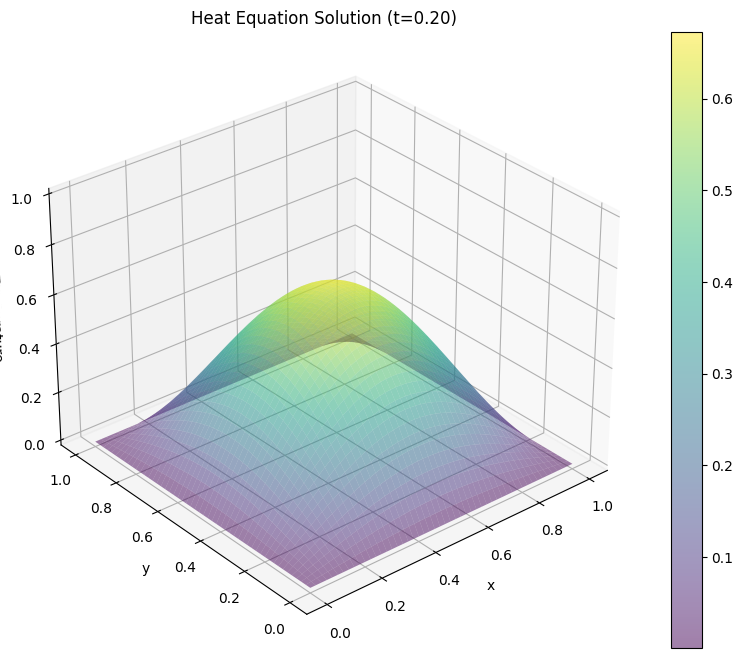

In [7]:
plot_solution(s1, np.linspace(0, 1, M+1), np.linspace(0, 1, M+1), 20)

Notice that this method is unconditionally stable in time and space, we can use any small $\Delta t$ or $\Delta x, \Delta y$ to get more accurate solution.

### Part b
We want to verify the accuracy of a scheme numerically, consider the resolution study.

$$
\frac{u_j^{2n}(\frac{\Delta t}{2})-u_j^n(\Delta t)}{u_j^{4n}(\frac{\Delta t}{4})-u_j^{2n}(\frac{\Delta t}{2})}=\frac{O(\frac{\Delta t}{2})^p-O(\Delta t)^p}{O(\frac{\Delta t}{4})^p-O(\frac{\Delta t}{2})^p}=2^p
$$

In this study we pick $\Delta t = 0.01, 0.005, 0.0025$, given by using num_steps of 100,200,400 for ADI method.

In [8]:
s100 = Adi(1.0,50,1.0,100)
s200 = Adi(1.0,50,1.0,200)
s400 = Adi(1.0,50,1.0,400)

Now we examine the solution at t=0.1s at the center of the grid (25,25).

In [9]:
a1 = s100[10,25,25]
b1 = s200[20,25,25]
c1 = s400[40,25,25]

print(abs((b1-a1)/(c1-b1)))

4.000051860268142


Easy to notice that 

$$
\frac{u_j^{2n}(\frac{\Delta t}{2})-u_j^n(\Delta t)}{u_j^{4n}(\frac{\Delta t}{4})-u_j^{2n}(\frac{\Delta t}{2})}\approx 2^2=4
$$

Hence we know that this method has a accuracy of $O(\Delta t)^2$ and is order 2 in time.

Similarily we want to test accuracy in space, we fix one time and let $\Delta x = \frac{\Delta x}{2}$
$$
\frac{u_{2j}^{n}(\frac{\Delta x}{2})-u_j^n(\Delta x)}{u_{4j}^{n}(\frac{\Delta x}{4})-u_{2j}^{n}(\frac{\Delta x}{2})}=\frac{O(\frac{\Delta x}{2})^p-O(\Delta x)^p}{O(\frac{\Delta x}{4})^p-O(\frac{\Delta x}{2})^p}=2^p
$$
Here we let $\Delta x,y = \frac{1}{25}, \frac{1}{50}, \frac{1}{100}$

In [10]:
sl25 = Adi(1.0,25,1.0,100)
sl50 = Adi(1.0,50,1.0,100)
sl100 = Adi(1.0,100,1.0,100)

In [11]:
a2 = sl25[10,12,12]
b2 = sl50[10,24,24]
c2 = sl100[10,48,48]
print(abs((b2-a2)/(c2-b2)))

3.998512946064615


By calculation we find that

$$
\frac{u_{2j}^{n}(\frac{\Delta x}{2})-u_j^n(\Delta x)}{u_{4j}^{n}(\frac{\Delta x}{4})-u_{2j}^{n}(\frac{\Delta x}{2})}=2^p\approx 2^2=4
$$

Hence this method has order of 2 in space.

### Part C
Plot the numerical approximation at three representative times to illustrate well
its time evolution.

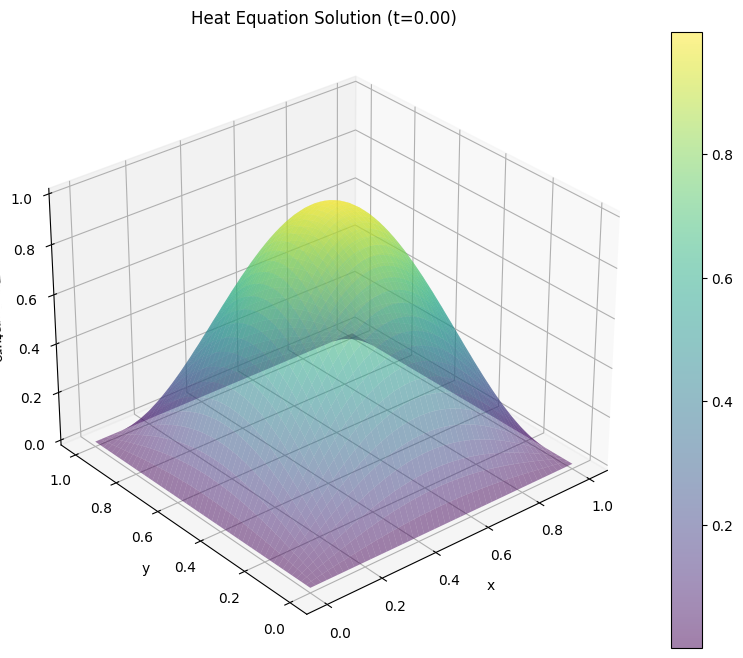

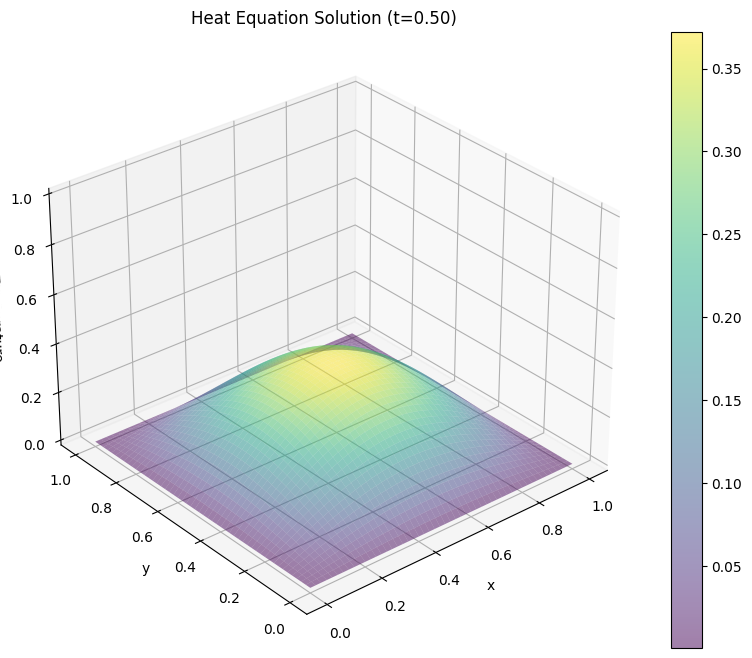

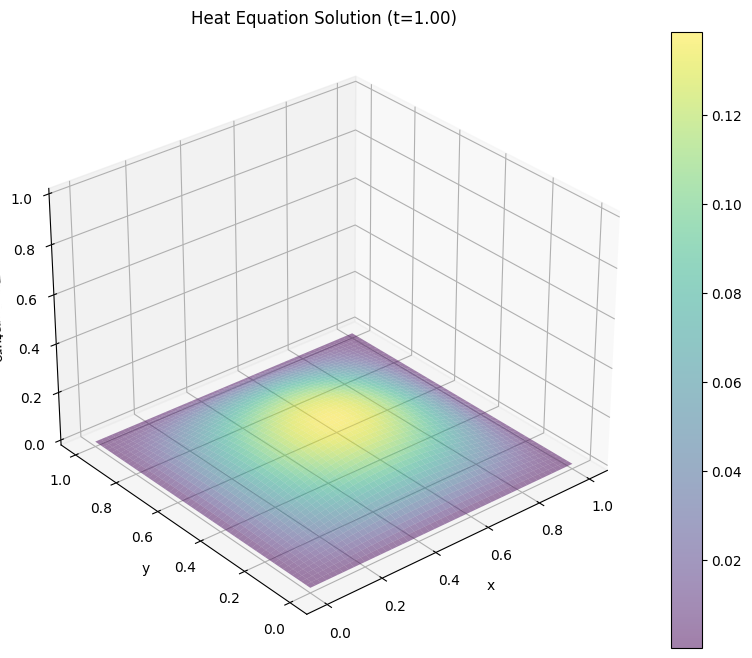

In [12]:
plot_solution(s1, np.linspace(0, 1, M+1), np.linspace(0, 1, M+1), 0)
plot_solution(s1, np.linspace(0, 1, M+1), np.linspace(0, 1, M+1), N//2)
plot_solution(s1, np.linspace(0, 1, M+1), np.linspace(0, 1, M+1), N)

### Part D
If faced with this particular problem, which method would you choose to use, ADI
or Crank-Nicolson? Explain.

**Response to this part:** 

Crank-Nicolson and ADI are both order 2 in time, order 2 in space, unconditionally stable method.

If we are using the Crank-Nicolson method, it requires solving a system of equations at each time step, which can be computationally intensive. If we are using the ADI method, we need to avoid the potential pattern of error when the operators are split (inserting the half steps). In the question, the problem is linear with the homogeneous Dirichlet boundary $u=0$, which is unlikely to have pattern of error while applying ADI method. Then with the consider of efficiency, I will choose ADI. 